### Exercise 6.1: 
A circuit of resistors   
Consider the following circuit of resistors:

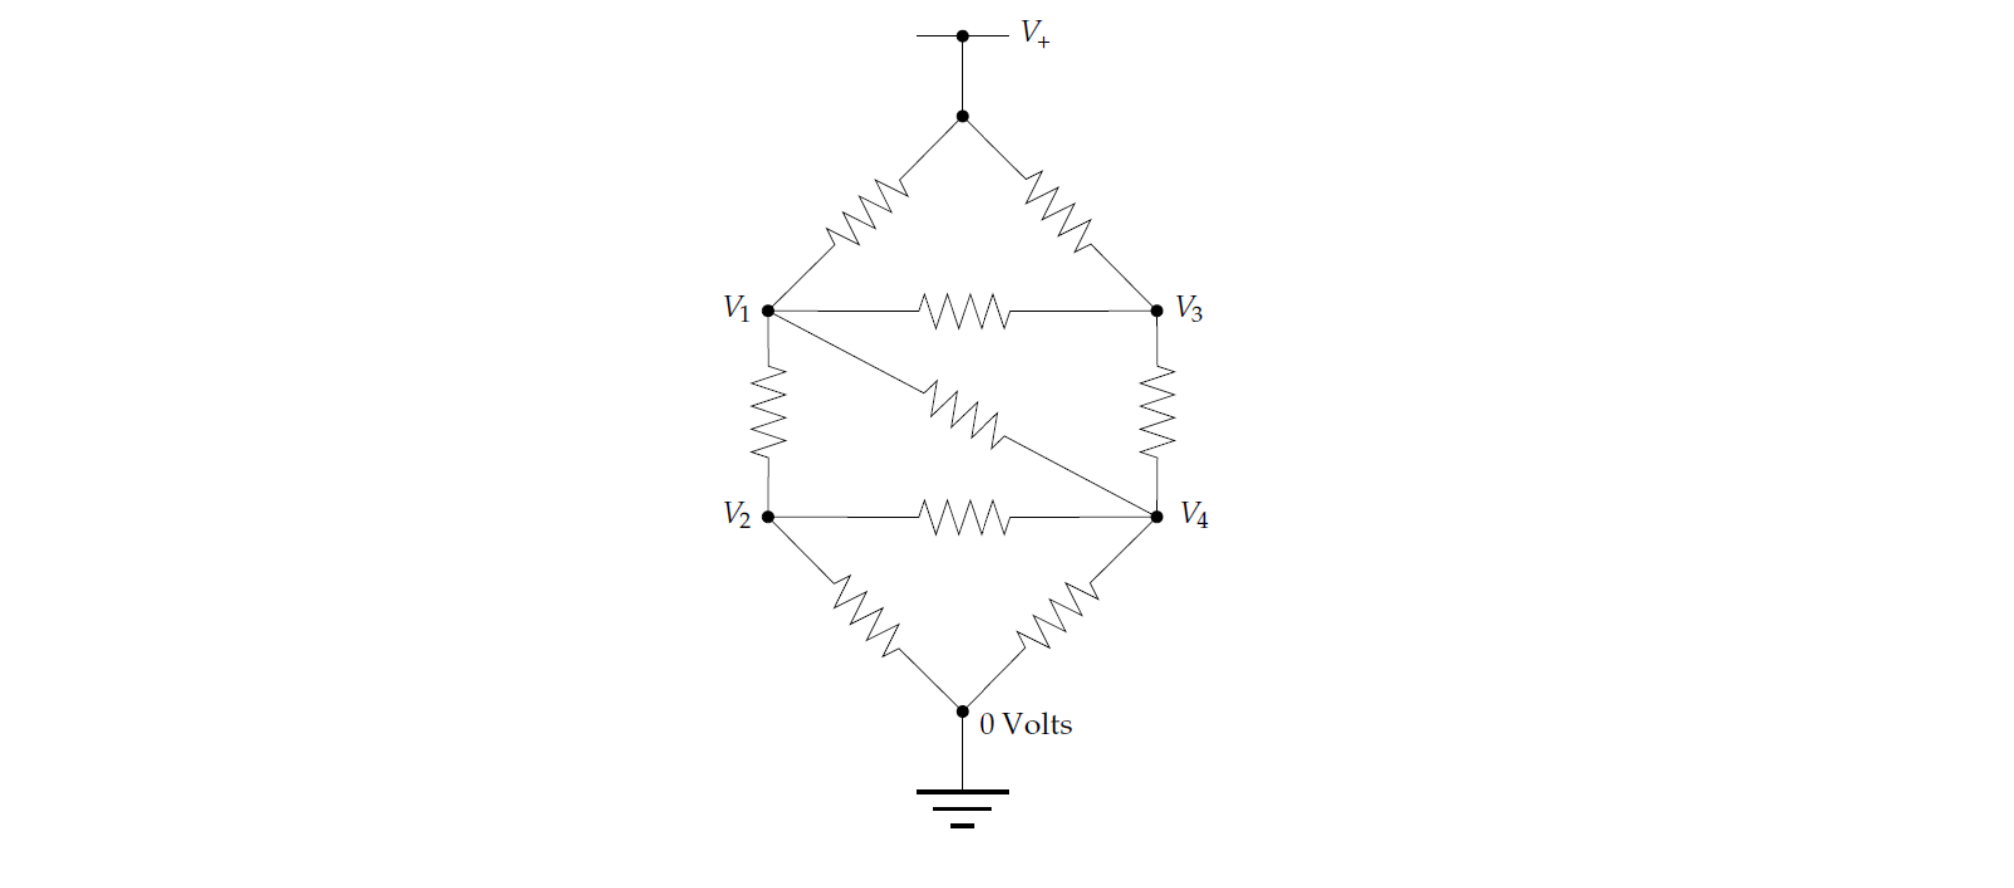

All the resistors have the same resistance $R$. The power rail at the top is at voltage $V_+ = 5V$. What are the other four voltages, $V_1$ to $V_4$?   
To answer this question we use Ohm's law and the Kirchhoff current law, which says that the total net current flow out of (or into) any junction in a circuit must be zero. Thus for the junction at voltage $V_1$, for instance, we have
\begin{gather} 
    \frac{V_1 - V_2}{R} + \frac{V_1 - V_3}{R} + \frac{V_1 - V_4}{R} + \frac{V_1 - V_+}{R} = 0
\end{gather}
or equivalently
\begin{gather} 
    4V_1 - V_2 - V_3 - V_4 = V_+
\end{gather}
**a)** Write similar equations for the other three junctions with unknown voltages. 
*** 

\begin{align*}
    4V_1 -  V_2  -  V_3  -  V_4  &= V_0 \\
    -V_1  + 3V_2 +  0   -  V_4  &= 0 \\
    -V_1  +  0   + 3V_3 -  V_4  &= V_0 \\
    -V_1  -  V_2  -  V_3  - 4V_4 &= 0 
\end{align*}

**b)** Write a program to solve the four resulting equations using Gaussian elimination and hence find the four voltages (or you can modify a program you already have, such as the program gausselim. py in Example 6.1).
***

In [12]:
# cell 1

import numpy as np

V = np.array([[ 4,-1,-1, -1],
                 [-1, 3, 0, -1],
                 [-1, 0, 3, -1],
                 [-1,-1,-1,  4]],float)
a = np.array([5,0,5,0],float)
N = len(a)


for h in range(N):
    div = V[h,h]
    V[h,:] /= div
    a[h] /= div
    for i in range(h+1,N):
        mult = V[i,h]
        V[i,:] -= mult * V[h,:]
        a[i] -= mult * a[h]
        
Vn = np.empty(N,float)
for j in range(N-1,-1,-1):
    Vn[j] = a[j]
    for k in range(j+1,N):
        Vn[j] -= V[j,k]*Vn[k]

print("V1 =",f'{Vn[0]:.2f}')
print("V2 =",f'{Vn[1]:.2f}')
print("V3 =",f'{Vn[2]:.2f}')
print("V4 =",f'{Vn[3]:.2f}')


V1 = 3.00
V2 = 1.67
V3 = 3.33
V4 = 2.00


### Exercise 6.2:
**a)** Modify the program gaussel im. py in Example 6.1 to incorporate partial pivoting (or you can write your own program from scratch if you prefer). Run your program and demon-strate that it gives the same answers as the original program when applied to Eq. (6.1)
***

**b)** Modify the program to solve the equations in (6.17) and show that it can find the solution to these as well, even though Gaussian elimination without pivoting fails. 
***

In [13]:

import numpy as np

A = np.array([[2, 1, 4, 1],
           [3, 4,-1,-1],
           [1,-4, 1, 5],
           [2,-2, 1, 3]],float)
v = np.array([-4,3,9,7],float)
N = len(v)

for l in range(N):
    if  A[l,0] <A[0,0]:
        A[[0,l],:]=A[[l,0],:]
        v[[0,l]]=v[[l,0]]
print(A)
print("\n",v)

for h in range(N):        
    div = A[h,h]
    A[h,:] /= div
    v[h] /= div
    for i in range(h+1,N):
        mult = A[i,h]
        A[i,:] -= mult * A[h,:]
        v[i] -= mult * v[h]
        
x = np.empty(N,float)
for j in range(N-1,-1,-1):
    x[j] = v[j]
    for k in range(j+1,N):
        x[j] -= A[j,k]*x[k]   
print("\n",A)
print("\n",v)


B = np.array([[0, 1, 4, 1],
           [3, 4,-1,-1],
           [1,-4, 1, 5],
           [2,-2, 1, 3]],float)
vb = np.array([-4,3,9,7],float)

for l in range(N):
    if B[l,0] > B[0,0]:
        B[[0,l],:]=B[[l,0],:]
        vb[[0,l]]=vb[[l,0]]

for h in range(N):        
    divB = B[h,h]
    B[h,:] /= divB
    vb[h] /= divB
    
    for i in range(h+1,N):
        multB = B[i,h]
        B[i,:] -= multB * B[h,:]
        vb[i] -= multB * vb[h]
        
y = np.empty(N,float)
for j in range(N-1,-1,-1):
    y[j] = vb[j]
    for k in range(j+1,N):
        y[j] -= B[j,k]*y[k]
        
print("\n",B)
print("\n",vb)

[[ 1. -4.  1.  5.]
 [ 3.  4. -1. -1.]
 [ 2.  1.  4.  1.]
 [ 2. -2.  1.  3.]]

 [ 9.  3. -4.  7.]

 [[ 1.   -4.    1.    5.  ]
 [ 0.    1.   -0.25 -1.  ]
 [ 0.    0.    1.    0.  ]
 [-0.   -0.   -0.    1.  ]]

 [ 9.  -1.5 -2.   1. ]

 [[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [-0.         -0.         -0.          1.        ]]

 [ 1.         -4.         -0.58823529  1.38095238]


### Exercise 6.4: 
Write a program to solve the resistor network problem of Exercise 6.1 on page 220 using the function solve from numpy. linalg. If you also did Exercise 6.1, you should check
that you get the same answer both times.
***

In [9]:
import numpy.linalg as npl
import numpy as np

V = np.array([[ 4,-1,-1, -1],
                 [-1, 3, 0, -1],
                 [-1, 0, 3, -1],
                 [-1,-1,-1,  4]],float)

a = np.array([5,0,5,0],float)

x = npl.solve(V,a)

print("V1 =",f'{x[0]:.2f}')
print("V2 =",f'{x[1]:.2f}')
print("V3 =",f'{x[2]:.2f}')
print("V4 =",f'{x[3]:.2f}')

V1 = 3.00
V2 = 1.67
V3 = 3.33
V4 = 2.00
